# LDA 

In [1]:
library("tidyverse")
library("caret")
library("lmtest")
library("magrittr")
library("dplyr")
library("tidyr")
library("popbio")
library("e1071")
library("PerformanceAnalytics")
library("corrplot")
library("corpcor")
library("MASS")
library("brant")
library("MASS")
library("ggplot2")

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.1.2"
Warning message:
"package 'readr' was built under R version 4.1.2"
Warning message:
"package 'forcats' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'lmtest' was built under R version 4.

### Set Working Directory

In [ ]:
setwd("/Users/georg/Documents/GitHub/TheThreeMusketeers")

### Import Dataset

In [6]:
wineqt <- read.csv("Data/WineQT.csv")
head(wineqt)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


## Data Wrangling 

#### Drop Id Column 

In [ ]:
wine_subset <- wineqt[, c(1,2,3,4,5,6,7,8,9,10,11,12)]

#### Recode into three groups

In [8]:
wine_subset$qualityR <- NA
wine_subset$qualityR [wine_subset$quality==3] <- 0
wine_subset$qualityR [wine_subset$quality==4] <- 0
wine_subset$qualityR [wine_subset$quality==5] <- 1
wine_subset$qualityR [wine_subset$quality==6] <- 1
wine_subset$qualityR [wine_subset$quality==7] <- 2
wine_subset$qualityR [wine_subset$quality==8] <- 2
head(wine_subset)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1


#### Drop Quality

In [11]:
wine_wrangled <- wine_subset[, c(2,5,8,9,13)]
head(wine_wrangled)

,volatile.acidity,chlorides,density,pH,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.70,0.076,0.9978,3.51,1
2,0.88,0.098,0.9968,3.20,1
3,0.76,0.092,0.9970,3.26,1
4,0.28,0.075,0.9980,3.16,1
5,0.70,0.076,0.9978,3.51,1
6,0.66,0.075,0.9978,3.51,1


#### Check All Data Types 

In [ ]:
str(wine_wrangled)

## Linear Discriminant Analysis

### Summarizing the dataset

In [13]:
summary(wine_wrangled)

 volatile.acidity   chlorides          density             pH       
 Min.   :0.1200   Min.   :0.01200   Min.   :0.9901   Min.   :2.740  
 1st Qu.:0.3925   1st Qu.:0.07000   1st Qu.:0.9956   1st Qu.:3.205  
 Median :0.5200   Median :0.07900   Median :0.9967   Median :3.310  
 Mean   :0.5313   Mean   :0.08693   Mean   :0.9967   Mean   :3.311  
 3rd Qu.:0.6400   3rd Qu.:0.09000   3rd Qu.:0.9978   3rd Qu.:3.400  
 Max.   :1.5800   Max.   :0.61100   Max.   :1.0037   Max.   :4.010  
    qualityR    
 Min.   :0.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.105  
 3rd Qu.:1.000  
 Max.   :2.000  

### Scale data

In [14]:
wine_wrangled[1:4] <- scale(wine_wrangled[1:4])

### Use 70% of dataset as training set and remaining 30% as testing set

In [20]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ] 

ERROR: Error in set.qualityR(1): could not find function "set.qualityR"


### Fit LDA model

In [22]:
model <- lda(qualityR~., data=train)

### View model output

In [22]:
model

Call:
lda(qualityR ~ ., data = train)

Prior probabilities of groups:
         0          1          2 
0.03349876 0.82878412 0.13771712 

Group means:
  volatile.acidity   chlorides     density          pH
0        1.1079900  0.33757466  0.01960293  0.38359939
1        0.1155951  0.01580388  0.03831060  0.02132853
2       -0.7619924 -0.23205600 -0.36949989 -0.13068940

Coefficients of linear discriminants:
                       LD1        LD2
volatile.acidity 0.9120380  0.1553226
chlorides        0.2331165  0.3909139
density          0.3670731 -0.9070867
pH               0.2380951  0.1778496

Proportion of trace:
   LD1    LD2 
0.9708 0.0292 

## Use LDA model to make predictions on test data

In [23]:
predicted <- predict(model, test)

names(predicted)

[1] "class"     "posterior" "x"

### Define data to plot

In [25]:
lda_plot <- cbind(train, predict(model)$x)

### Create plot

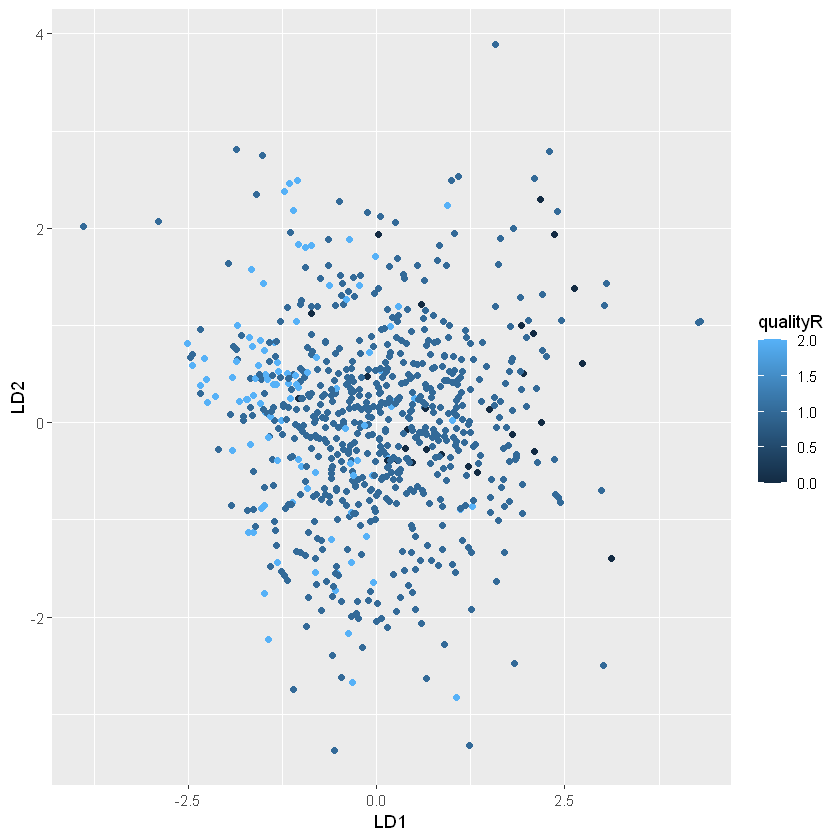

In [25]:
ggplot(lda_plot, aes(LD1, LD2)) +
  geom_point(aes(color = qualityR))